In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01',periods=365*2,freq='D')
df = pd.DataFrame({'ds':ds,'y':result})
df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


<AxesSubplot:>

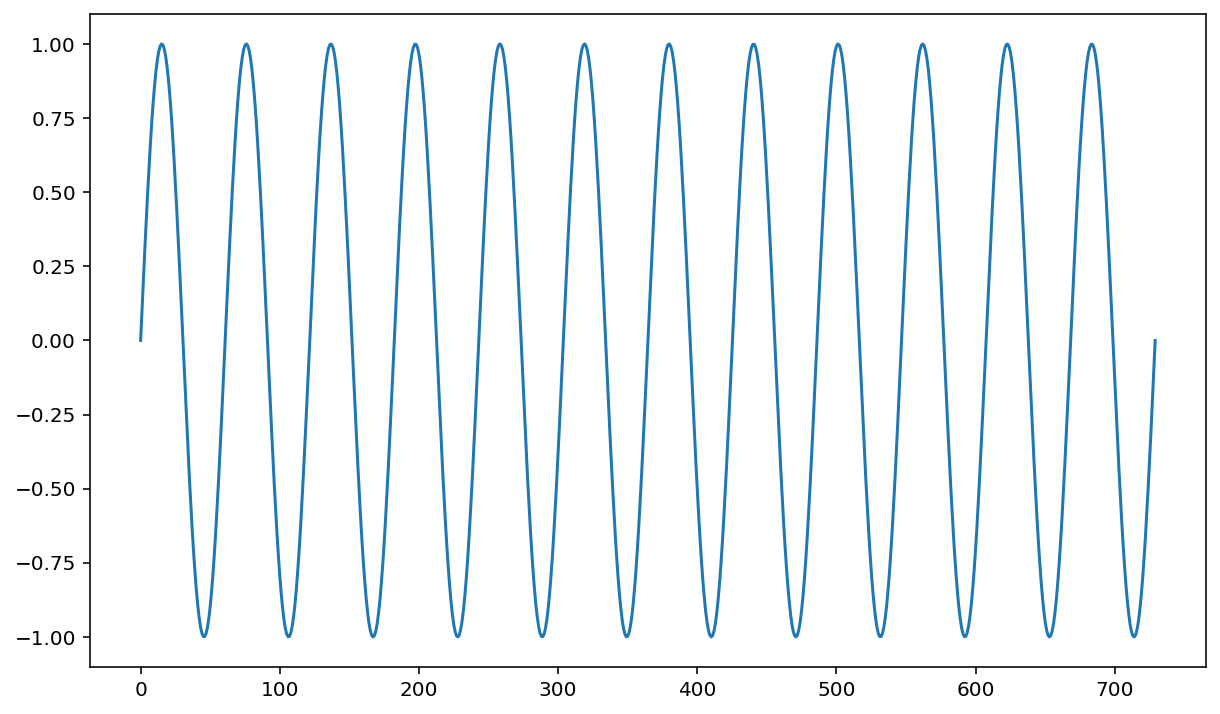

In [3]:
df['y'].plot(figsize=(10,6))

In [4]:
pip install pystan

     |████████████████████████████████| 39.1 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 619 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install fbprophet

     |████████████████████████████████| 64 kB 381 kB/s eta 0:00:011
     |████████████████████████████████| 47 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 731 kB/s eta 0:00:01     |██████████████████▎             | 3.1 MB 645 kB/s eta 0:00:04
     |████████████████████████████████| 1.5 MB 1.7 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/song-kang/opt/anaconda3/envs/fc14/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zj/p1t6dg4s2k1408bb5kd53pw40000gp/T/pip-install-wng37tdl/fbprophet_513502193fd94ec997be55b63df6e0a1/setup.py'"'"'; __file__='"'"'/private/var/folders/zj/p1t6dg4s2k1408bb5kd53pw40000gp/T/pip-install-wng37tdl/fbprophet_513502193fd94ec997be55b63df6e0a1/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().rep

    Running setup.py install for fbprophet ... done
  DEPRECATION: fbprophet was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df);

In [14]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

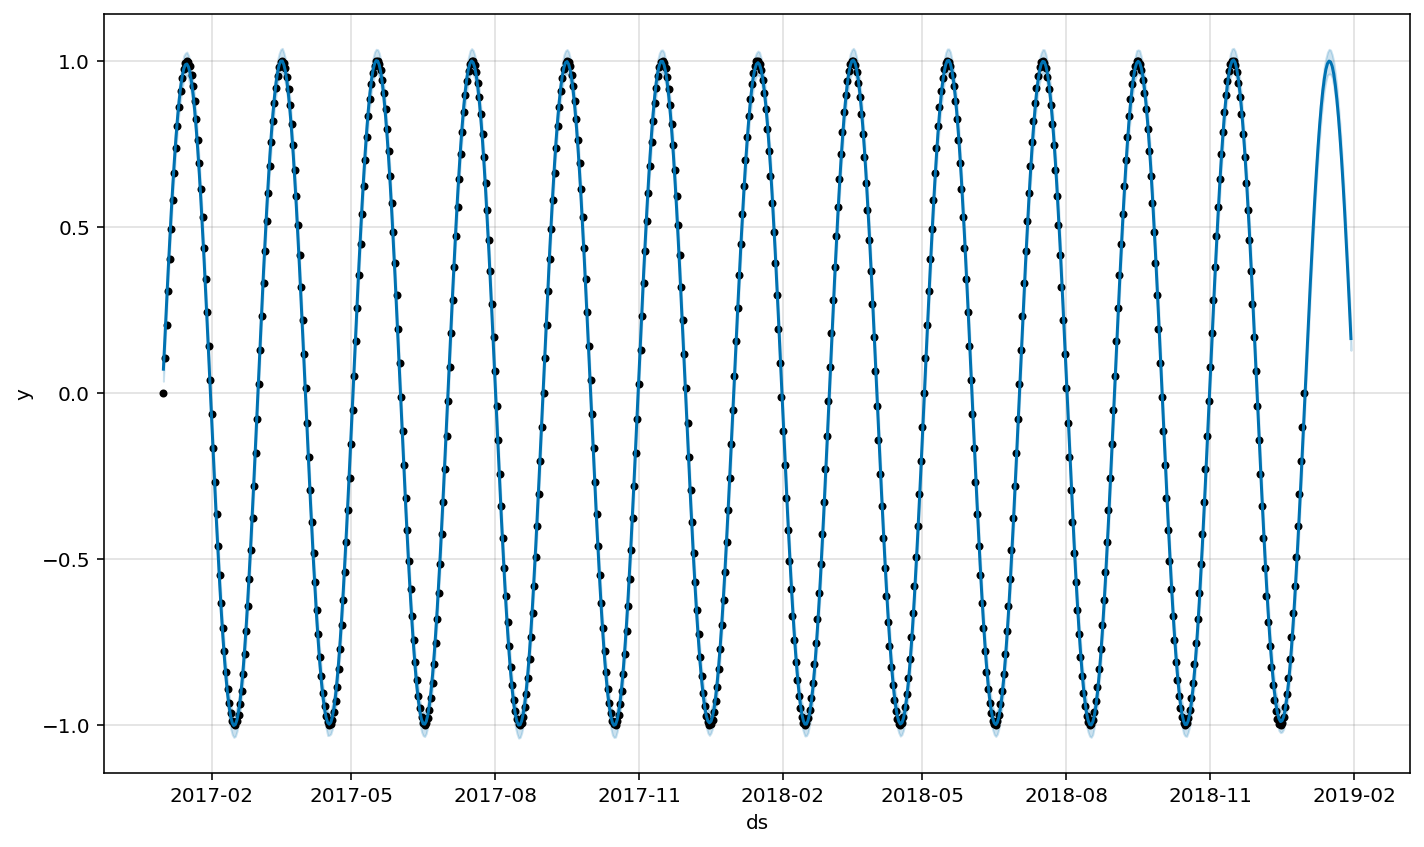

In [15]:
m.plot(forecast);

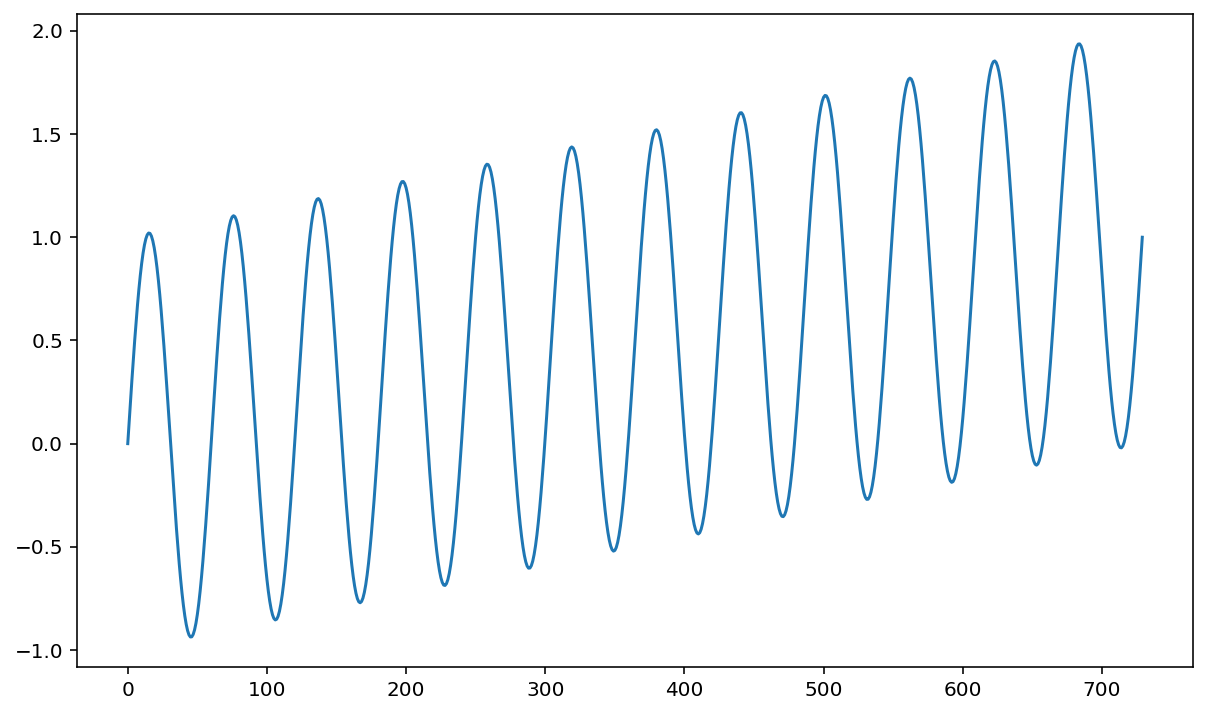

In [17]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2017-01-01',periods=365*2,freq ='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6));

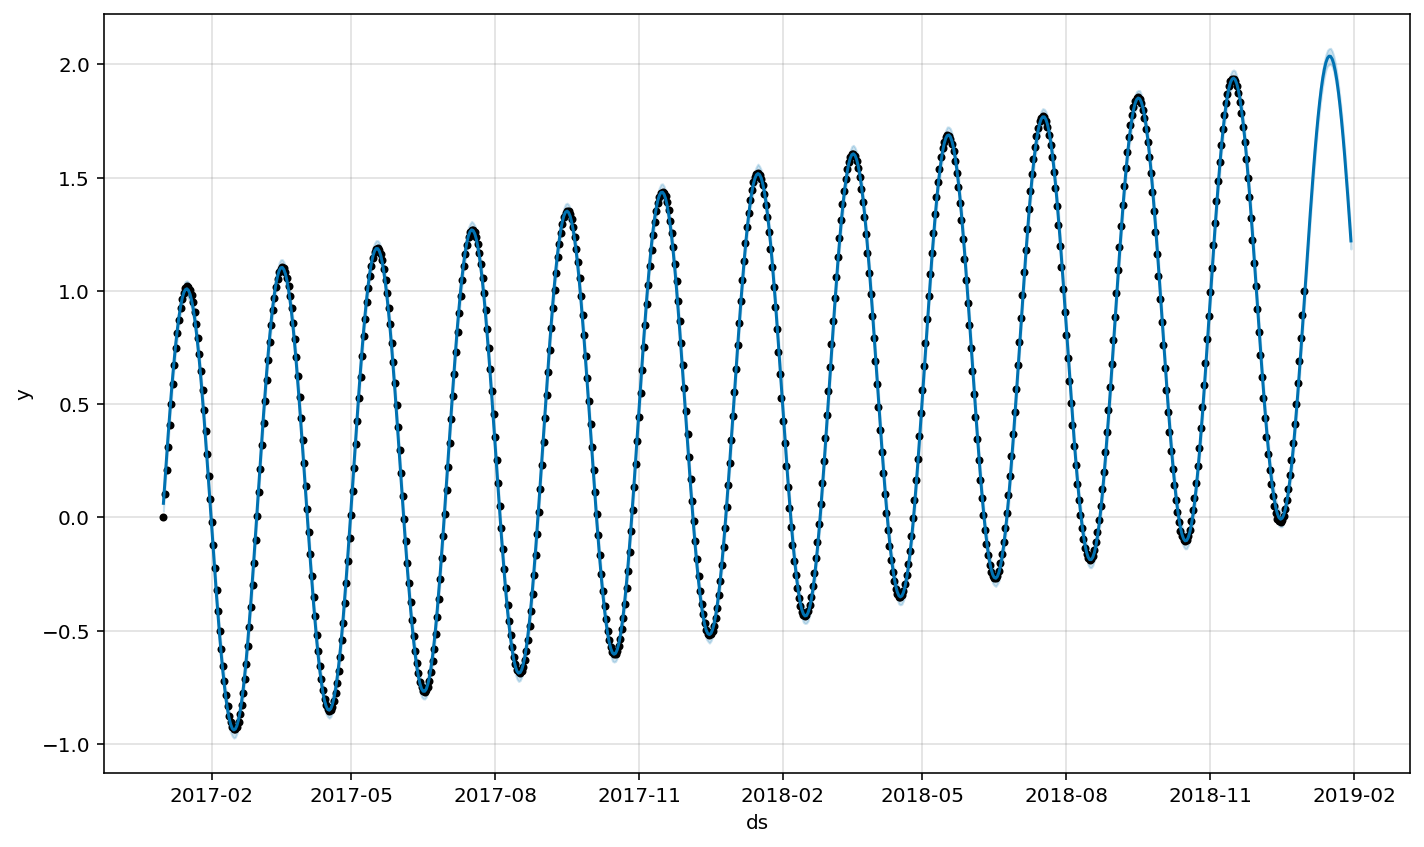

In [18]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

<AxesSubplot:>

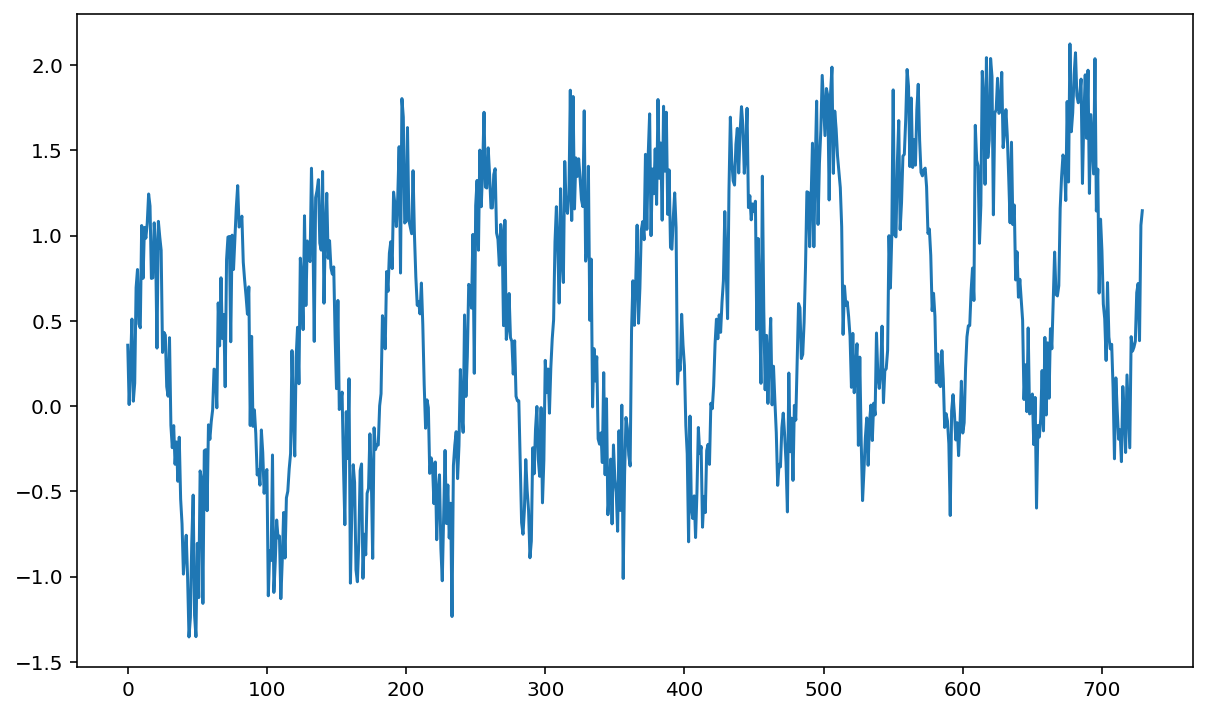

In [19]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2017-01-01',periods=365*2,freq='D')
df = pd.DataFrame({'ds':ds,'y':result})
df['y'].plot(figsize=(10,6))

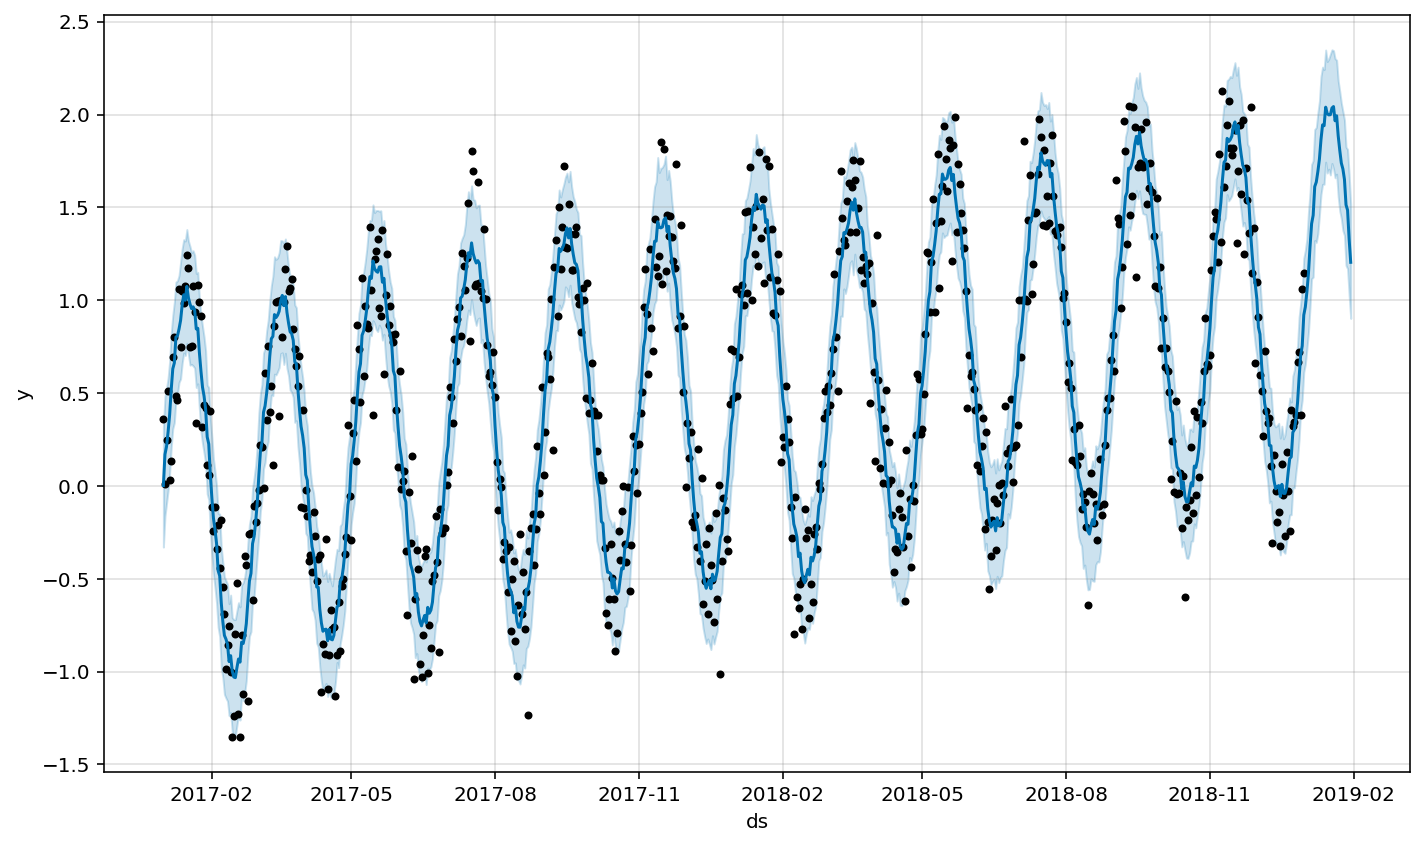

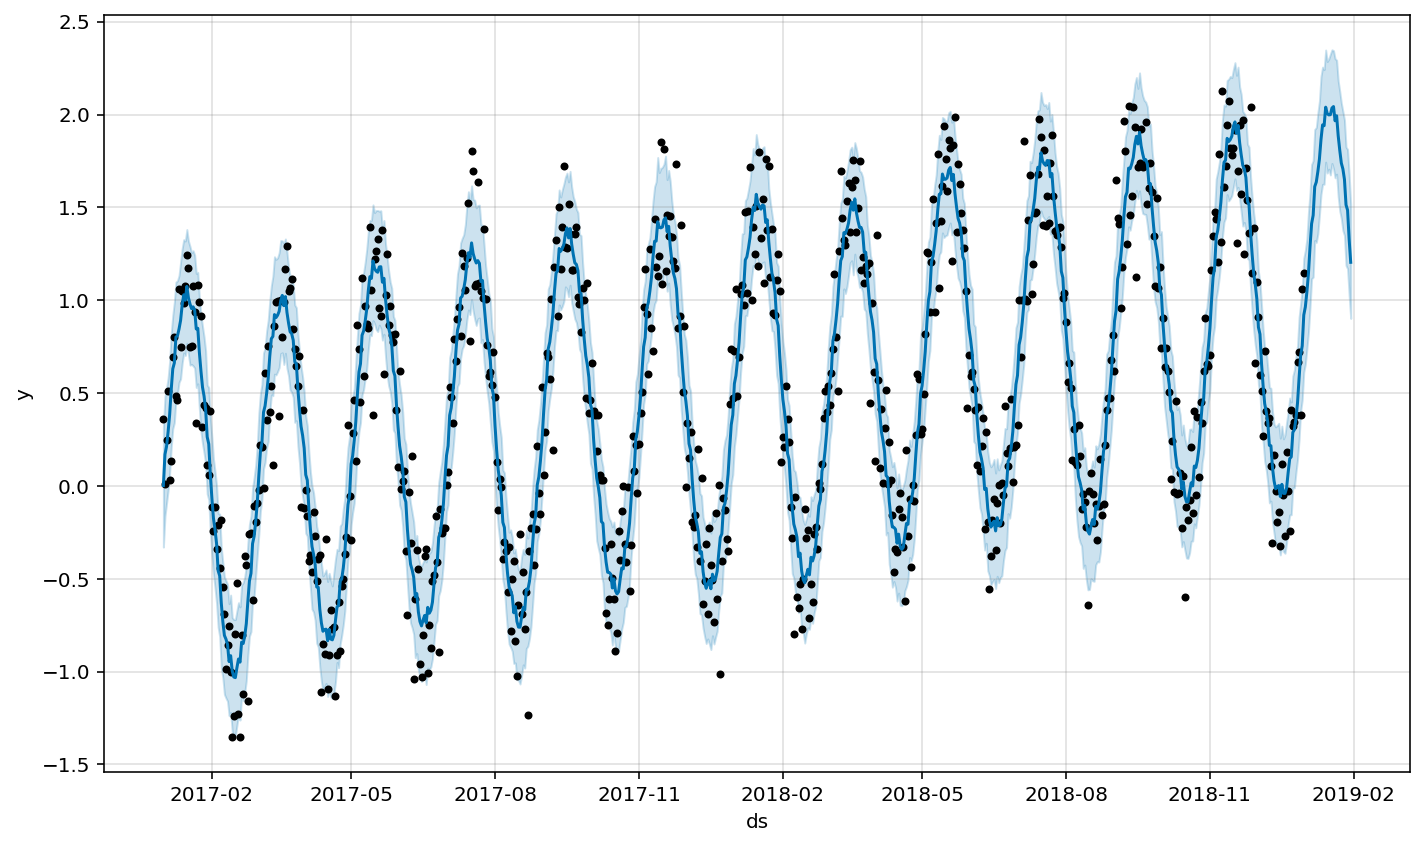

In [20]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

In [21]:
pinkwink_web = pd.read_excel('./data/pinkwink_web.xlsx',names=['ds','hit'])
pinkwink_web.head()

,ds,hit
0,2016-01-01,228
1,2016-01-02,304
2,2016-01-03,304
3,2016-01-04,659
4,2016-01-05,769


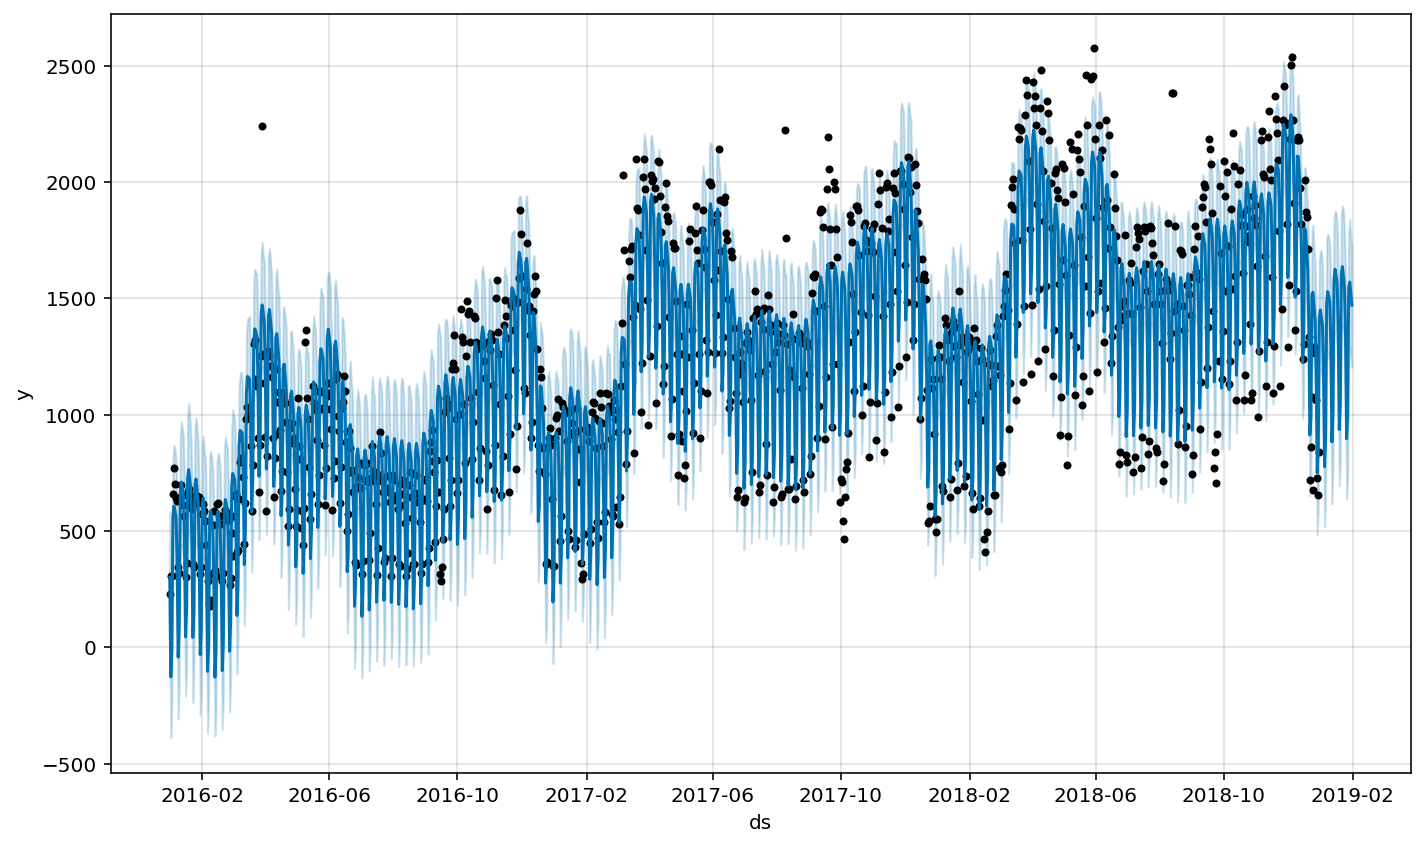

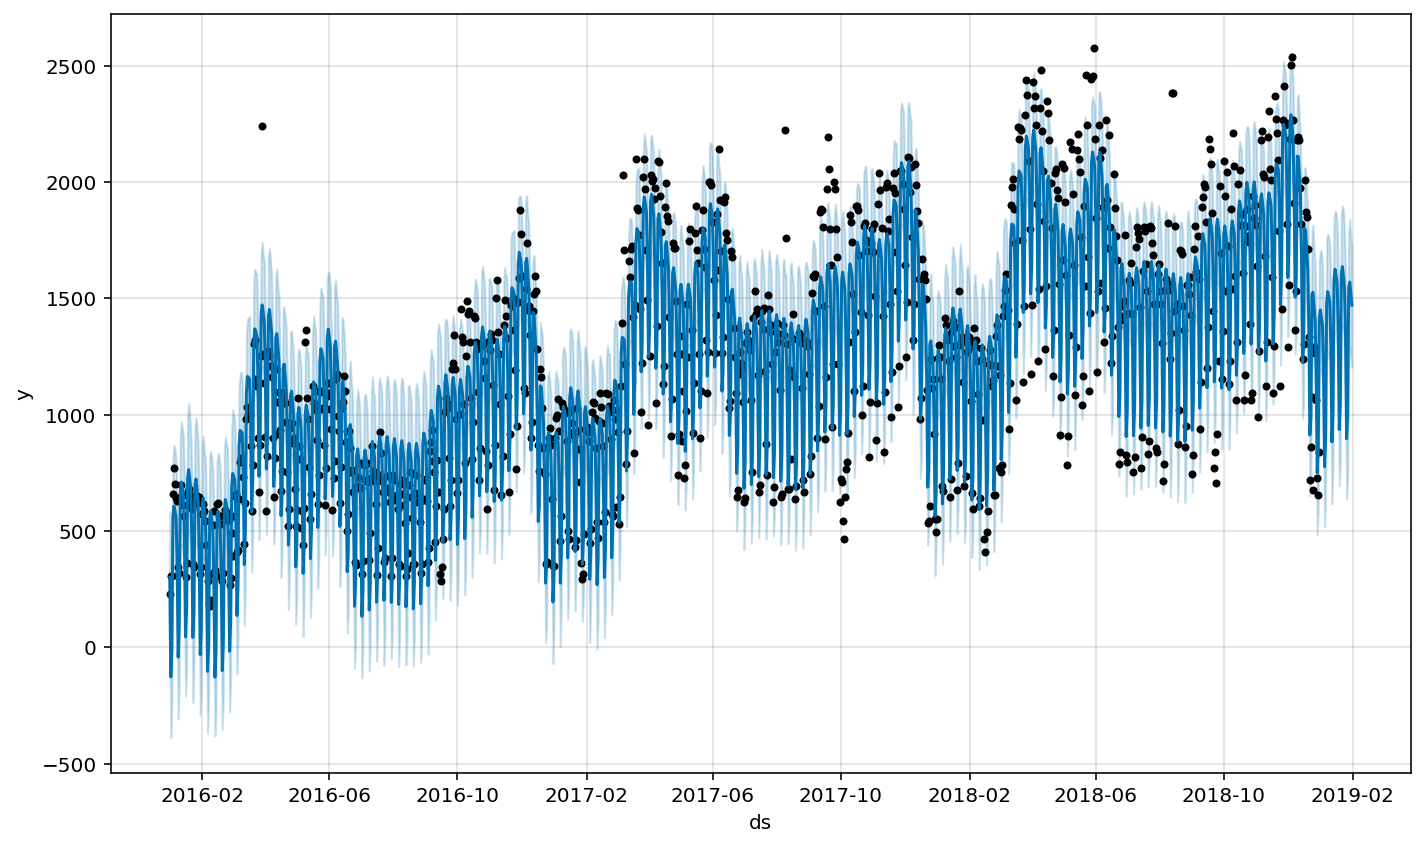

In [22]:
df = pd.DataFrame({'ds':pd.to_datetime(pinkwink_web['ds'],
                                      format="%y. %m. %d"),
                  'y':pinkwink_web['hit']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast)

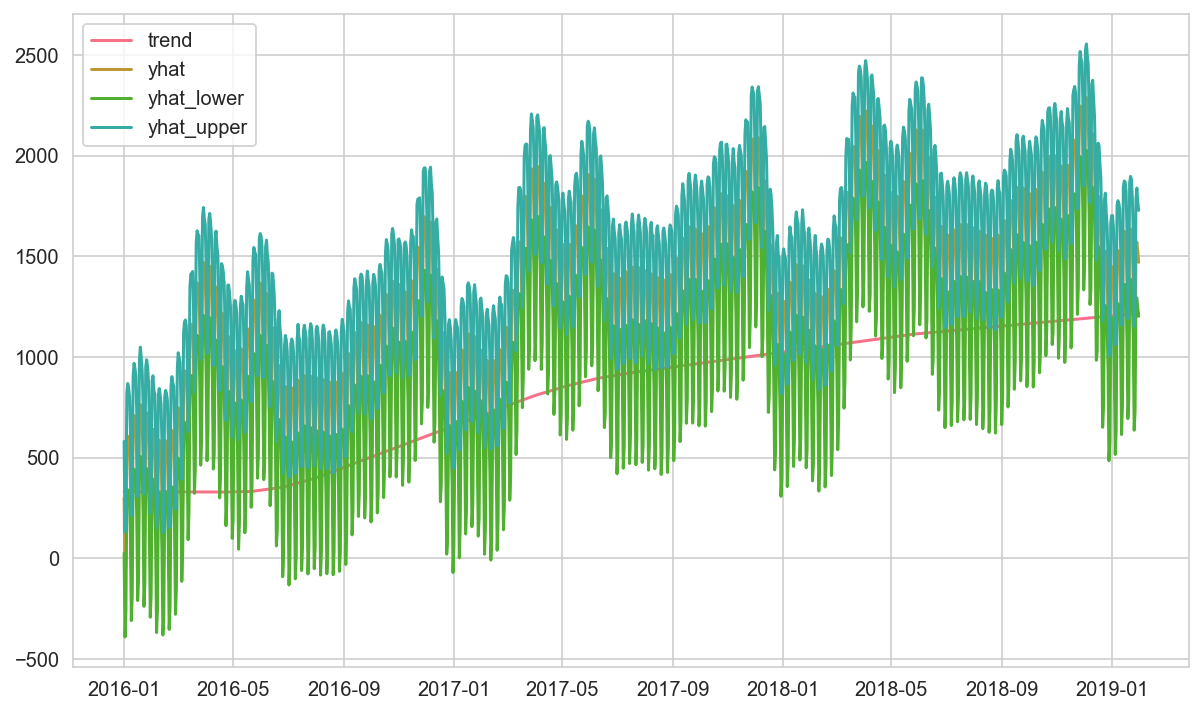

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
for each in ['trend','yhat','yhat_lower','yhat_upper']:
    plt.plot(forecast['ds'],forecast[each],label=each)
    
plt.legend(loc='best')
plt.show()

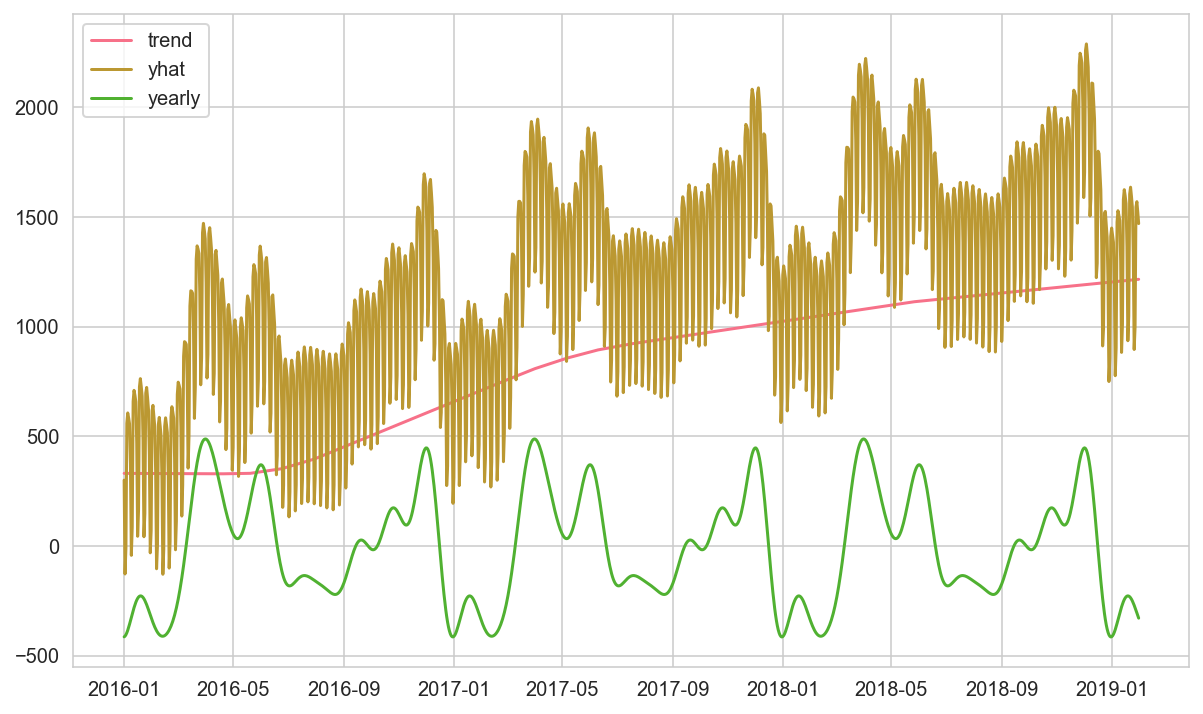

In [24]:
plt.figure(figsize=(10,6))
for each in ['trend','yhat','yearly']:
    plt.plot(forecast['ds'],forecast[each],label=each)
    
plt.legend(loc='best')
plt.show()

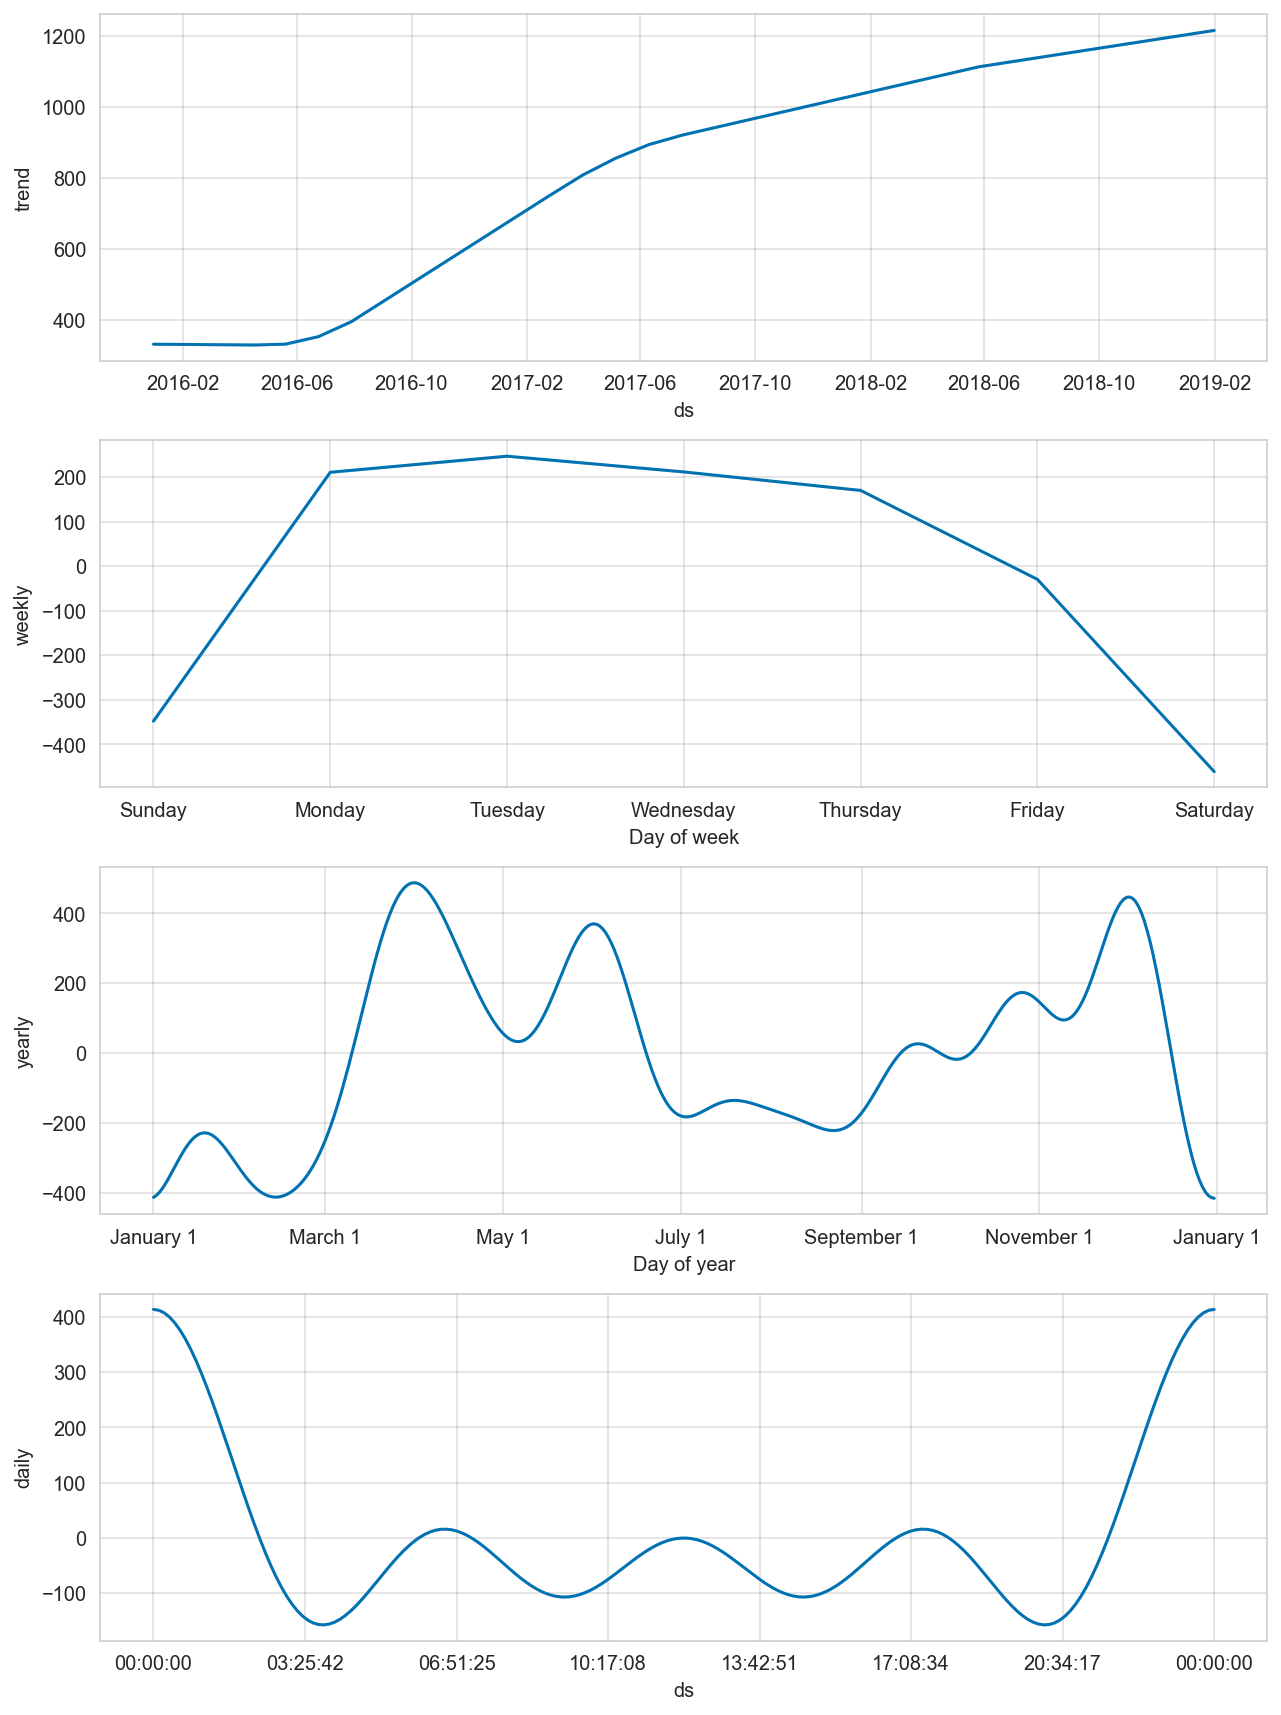

In [25]:
m.plot_components(forecast);